In [297]:
import numpy as np

In [245]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Load Titanic dataset from an online source
url = R"C:\Users\toloz\Ironhack\Week 2\Project\GSAF5.xlsx"
df = pd.read_excel(url) 

In [247]:
# I will drop those additional columns that appeared out of nowhere 
df = df.drop(columns=["pdf", "href formula", "href", "Case Number", "Case Number.1", "original order", "Unnamed: 21", "Unnamed: 22"])


Columns like Date and year should not coexist only date if we want to time series analyze we can then just extract the month or the year from the Date 
Also change the data type of the column date into datetime()


In [250]:
# for column in df:
  #  print(df[column].value_counts())

In [252]:
df["Activity"].value_counts()

Activity
Surfing                                          1133
Swimming                                          997
Fishing                                           490
Spearfishing                                      388
Wading                                            177
                                                 ... 
Diving for abalone (Scuba)                          1
Floating on a small orange raft                     1
Filming & feeding captive sharks                    1
Attempting to drive shark away from the beach       1
Wreck of  large double sailing canoe                1
Name: count, Length: 1605, dtype: int64

Date data type should change to a data type of datetime 
remove the year since we can get the year from date 
In the Age maybe we could remove everything that has symbols or text and turn into integer 
change fatal to boolean 

In [257]:
# Lets first change the columns names to lower case and remove white space for example in Fatal y/n
df.rename(columns={ col: col.strip().replace(" ", "_").lower() for col in df.columns }, inplace=True)
#for columns in df.columns:
   # print(columns)

In [259]:
df

,date,year,type,country,state,location,activity,name,sex,age,injury,fatal_y/n,time,species,source
0,2025-06-17 00:00:00,2025.0,Unprovoked,USA,South Carolina,Hilton Head Island,Swimming,Not stated,F,12,Laceration to lower right leg,N,1200hrs,Not stated,Kevin McMurray Trackingsharks.com:
1,2025-06-11 00:00:00,2025.0,Unprovoked,USA,Florida,Boca Grande,Snorkeling,Leah Lendel,F,9,Right hand almost torn off,N,12.11 hrs,Bull shark,Kevin McMurray Trackingsharks.com: James Kings...
2,2025-05-29 00:00:00,2025.0,Unprovoked,USA,North Carolina,Sunset Beach,Swimming,Sean Barton,M,26,Gash to lower left leg,N,1100hrs,Not stated,Kevin McMurray Trackingsharks.com: Clay Crewel...
3,2025-05-26 00:00:00,2025.0,Unprovoked,Vanuatu,South Santo,Espiitu Santo Island,Swimming,Tumas,M,14,Multiple injuries to body one hand and leg bit...,Y,pm,Not stated,Kevin McMurray Trackingsharks.com
4,2025-05-15 00:00:00,2025.0,Unprovoked,Australia,South Australia,Port Noarlunga,Swimming,Richard Vinall,M,66,Injury to thigh,N,0945hrs,Not stated,Simon DeMarchi: Todd Smith: 9 News:ABC News
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7015,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, p. 234"
7016,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, pp. 233-234"
7017,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,NaN,FATAL,Y,NaN,NaN,"F. Schwartz, p.23; C. Creswell, GSAF"
7018,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,NaN,FATAL,Y,NaN,NaN,"The Sun, 10/20/1938"


In [261]:
df["type"].unique()

array(['Unprovoked', 'Questionable', 'unprovoked', 'Provoked',
       ' Provoked', 'Watercraft', 'Sea Disaster', nan, '?', 'Unconfirmed',
       'Unverified', 'Invalid', 'Under investigation', 'Boat'],
      dtype=object)

In [263]:
#Checking for null values
df.isna().sum()

date            0
year            2
type           18
country        50
state         485
location      566
activity      585
name          219
sex           579
age          2994
injury         35
fatal_y/n     561
time         3526
species      3131
source         19
dtype: int64

In [265]:
# check any duplicates in the data
df.duplicated().sum()

1

In [267]:
df[df.duplicated()]

,date,year,type,country,state,location,activity,name,sex,age,injury,fatal_y/n,time,species,source
5394,Fall 1943,1943.0,Unprovoked,USA,Hawaii,"Midway Island, Northwestern Hawaiian Islands",Spearfishing,2 males,M,NaN,Calf nipped in each case,N,NaN,"""small sharks""",W. M. Chapman


In [269]:
# Since we only have one duplicate I will just go ahead and remove it
df.drop_duplicates(inplace=True)

In [271]:
# Lets now do an example of data standardize 
df["fatal_y/n"].value_counts()

fatal_y/n
N          4887
Y          1479
UNKNOWN      71
 N            7
F             5
M             3
n             1
Nq            1
2017          1
Y x 2         1
N             1
y             1
Name: count, dtype: int64

In [273]:
# As we can see, there are some variations of 'N' and 'Y'.
# Since we can't be sure what '2017', 'M', or 'F' are supposed to represent,
# we'll replace them with 'UNKNOWN' as they are unclear or invalid responses.

In [275]:
df["fatal_y/n"] = df["fatal_y/n"].str.strip().str.upper().replace({"n":"N", "F":"UNKNOWN","M":"UNKNOWN","NQ":"UNKNOWN","2017":"UNKNOWN","Y X 2": "Y"})

In [281]:
# Lets check our changes 
df["fatal_y/n"].value_counts()

fatal_y/n
N          4896
Y          1481
UNKNOWN     642
Name: count, dtype: int64

In [279]:
# Since in the fatal there is 561 na its safe to assume that is UNKOWN and we can replace those nulls with fillna
df["fatal_y/n"] = df["fatal_y/n"].fillna("UNKNOWN")

In [283]:
Filtered_by_year = df[df["year"].between(2000,2019)]

In [109]:
Filtered_by_year["type"].unique()

array(['Unprovoked', 'Provoked', 'Questionable', 'Watercraft',
       'Unconfirmed', 'Unverified', 'Invalid', 'Under investigation',
       'Sea Disaster', nan], dtype=object)

In [426]:
Fatal_Attacks_Years = Filtered_by_year[
    (Filtered_by_year["fatal_y/n"] == 'Y') | (Filtered_by_year["fatal_y/n"] == 'N')
].groupby('year')['fatal_y/n'].value_counts()


In [355]:
Filtered_by_year["year"] = Filtered_by_year["year"].astype(int)


C:\Users\toloz\AppData\Local\Temp\ipykernel_33496\1279502349.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Filtered_by_year["year"] = Filtered_by_year["year"].astype(int)


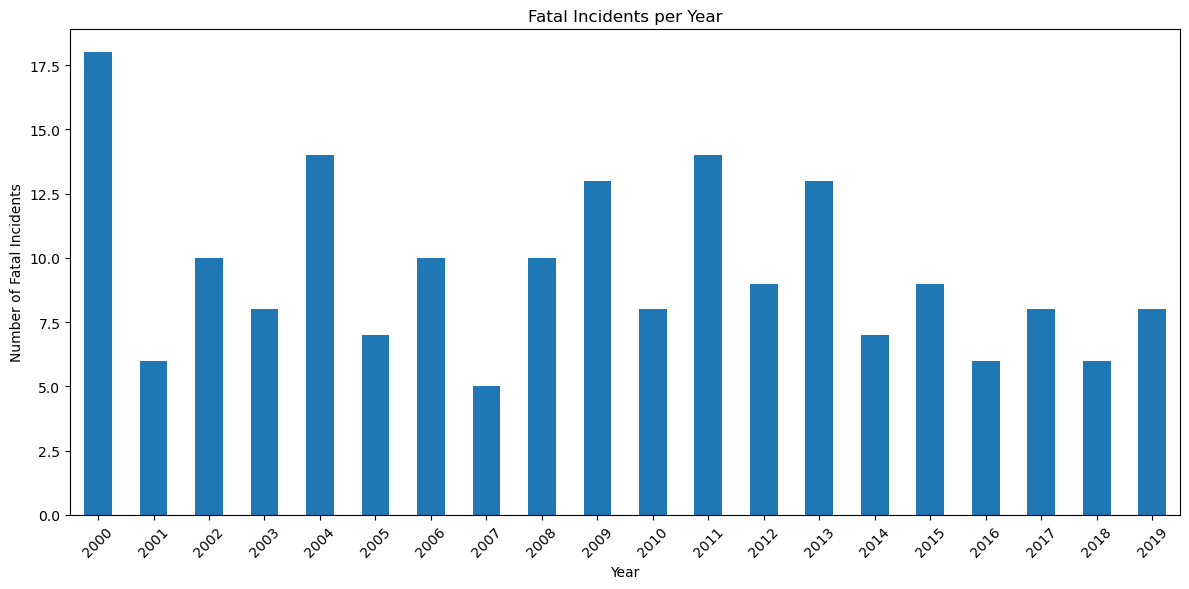

In [428]:
# Step 1: Unstack to get 'Y' and 'N' as columns

Fatal_Attacks_Years_v2 = Fatal_Attacks_Years.unstack()
Fatal_Attacks_Years_v2.index = Fatal_Attacks_Years_v2.index.astype(int)

# Step 2: Plot only the 'Y' column (fatal incidents) as a bar chart
Fatal_Attacks_Years_v2['Y'].plot(kind='bar', figsize=(12, 6))

# Step 3: Labels and formatting
plt.title('Fatal Incidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Fatal Incidents')
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig('fatal_attacks_per_year.png')
plt.show()


In [209]:
Filtered_by_year["age"].unique()

array(['30s', 45, 33, nan, 17, 37, 70, 57, 22, 9, 30, 38, 23, 44,
       '28 & 22', 32, 35, 20, 29, 51, 13, '22, 57, 31', '60s', 40, 11, 26,
       16, 21, 49, 18, "20's", 43, 8, 50, 64, 19, 65, 10, 67, 53, 28, 34,
       12, 25, 58, 74, 46, 41, 31, 15, '9 & 60', 48, 24, 36, '20s', 42,
       55, 39, 14, 56, 61, 'a minor', 6, 62, 52, 60, 54, 69, '40s', 7, 3,
       82, 73, 68, 'Teen', 47, '40?', 66, '?', 72, 59, 27, 71, '38', '39',
       '23', '32', '52', '68', '12', '18', '19', '43', '47', '6', '37',
       '9', '36', '10', '16', '13', '11', '17', '14', '30', '50', '29',
       '65', '63', '26', '71', '48', '70', '58', '18 months', '22', '41',
       '35', '57', '20', '24', '34', '15', '44', '53', '7', '40', '28',
       '33', '31', '45', '50s', '8', '51', '61', '42', '25', '66', '21',
       '77', '46', '60', '74', '55', '27', '3', '56', '64', 'teen',
       '28 & 26', '62', '5', '49', '54', '86', '59', '18 or 20',
       '12 or 13', '46 & 34', '28, 23 & 30', 'Teens', 77, 63, '36 & 

In [299]:
Filtered_by_year['age'] = Filtered_by_year['age'].astype(str).str.findall(r'\d+').apply(lambda x: x[0] if x else np.nan)


C:\Users\toloz\AppData\Local\Temp\ipykernel_33496\299505130.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Filtered_by_year['age'] = Filtered_by_year['age'].astype(str).str.findall(r'\d+').apply(lambda x: x[0] if x else np.nan)


In [307]:
Filtered_by_year['age'].unique()

<IntegerArray>
[  30,   45,   33, <NA>,   17,   37,   70,   57,   22,    9,   38,   23,   44,
   28,   32,   35,   20,   29,   51,   13,   60,   40,   11,   26,   16,   21,
   49,   18,   43,    8,   50,   64,   19,   65,   10,   67,   53,   34,   12,
   25,   58,   74,   46,   41,   31,   15,   48,   24,   36,   42,   55,   39,
   14,   56,   61,    6,   62,   52,   54,   69,    7,    3,   82,   73,   68,
   47,   66,   72,   59,   27,   71,   63,   77,    5,   86,   84,   75]
Length: 77, dtype: Int64

In [404]:
Filtered_by_year['age'] = pd.to_numeric(Filtered_by_year['age'], errors='coerce').astype('Int64')

C:\Users\toloz\AppData\Local\Temp\ipykernel_33496\2245634184.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Filtered_by_year['age'] = pd.to_numeric(Filtered_by_year['age'], errors='coerce').astype('Int64')


In [311]:
main_activities = ['Swimming', 'Spearfishing', 'Boogie boarding', 'Surfing', 'Fishing', 'Free diving', 'Kayaking', 'Snorkeling']

Filtered_by_year['activity_clean'] = Filtered_by_year['activity'].apply(
    lambda x: 'Other' if pd.isna(x) else (
        [activity for activity in main_activities if activity.lower() in x.lower()][0]
        if any(activity.lower() in x.lower() for activity in main_activities)
        else 'Other'
    )
)


C:\Users\toloz\AppData\Local\Temp\ipykernel_33496\394027493.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Filtered_by_year['activity_clean'] = Filtered_by_year['activity'].apply(


In [315]:
Filtered_by_year['activity_clean'].value_counts()

activity_clean
Surfing            738
Other              644
Swimming           346
Fishing            222
Spearfishing       148
Snorkeling          86
Boogie boarding     46
Kayaking            30
Free diving         11
Name: count, dtype: int64

In [ ]:
Filtered_by_year.groupby([""])

In [323]:
Filtered_by_year.columns

Index(['date', 'year', 'type', 'country', 'state', 'location', 'activity',
       'name', 'sex', 'age', 'injury', 'fatal_y/n', 'time', 'species',
       'source', 'activity_clean'],
      dtype='object')

In [385]:
Filtered_by_year["type"].unique()

array(['Unprovoked', 'Provoked', 'Questionable', 'Watercraft',
       'Unconfirmed', 'Unverified', 'Invalid', 'Under investigation',
       'Sea Disaster', nan], dtype=object)

In [412]:
def age_group(age):
    if pd.isna(age):
        return 'Unknown'
    elif age < 40:
        return 'Young Adult'
    elif age < 70:
        return 'Middle Aged'
    else:
        return 'Old'

Filtered_by_year['grouped_ages'] = Filtered_by_year['age'].apply(age_group)


C:\Users\toloz\AppData\Local\Temp\ipykernel_33496\964303775.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Filtered_by_year['grouped_ages'] = Filtered_by_year['age'].apply(age_group)


In [418]:
top_activity_per_age_group = (
    age_activity_type_counts
    .groupby('grouped_ages')
    .head(1)
    .sort_values(by='count', ascending=False)
)

print(top_activity_per_age_group)


   grouped_ages activity_clean        type  count
17  Young Adult       Swimming  Unprovoked     33
8   Middle Aged       Swimming  Unprovoked     12
10          Old       Swimming  Unprovoked      3


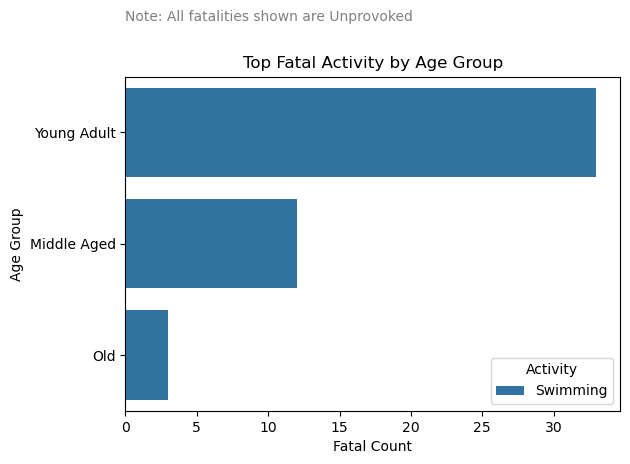

In [430]:
sns.barplot(
    data=top_activity_per_age_group,
    x='count',
    y='grouped_ages',
    hue='activity_clean'
)
plt.title('Top Fatal Activity by Age Group')
plt.xlabel('Fatal Count')
plt.ylabel('Age Group')
plt.legend(title='Activity')

# Add note
plt.text(
    x=0, y=-1,
    s='Note: All fatalities shown are Unprovoked',
    fontsize=10,
    color='gray'
)

plt.tight_layout()
plt.savefig('top_fatal_activity_by_age_group.png')  # Save the plot
plt.show()